In [1]:
!pip install bltk

##**Importing Libraries**


In [2]:
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer # BLTK: The Bengali Natural Language Processing Toolkit
from bltk.langtools import remove_stopwords
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import collections
import nltk
import numpy as np
import pandas as pd
import codecs

In [3]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)



In [4]:
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['‡¶Ö', '‡¶Ü', '‡¶á', '‡¶à', '‡¶â', '‡¶ä', '‡¶ã', '‡¶å', '‡¶è', '‡¶ê', '‡¶ì', '‡¶î']
Vowel signs: ['‡¶æ', '‡¶ø', '‡ßÄ', '‡ßÅ', '‡ßÇ', '‡ßÉ', '‡ßÑ', '‡ßá', '‡ßà', '‡ßã', '‡ßå']
Consonants: ['‡¶ï', '‡¶ñ', '‡¶ó', '‡¶ò', '‡¶ô', '‡¶ö', '‡¶õ', '‡¶ú', '‡¶ù', '‡¶û', '‡¶ü', '‡¶†', '‡¶°', '‡¶¢', '‡¶£', '‡¶§', '‡¶•', '‡¶¶', '‡¶ß', '‡¶®', '‡¶™', '‡¶´', '‡¶¨', '‡¶≠', '‡¶Æ', '‡¶Ø', '‡¶∞', '‡¶≤', '‡¶∂', '‡¶∑', '‡¶∏', '‡¶π', '‡ßú', '‡ßù', '‡ßü', '‡ßé', '‡¶Ç', '‡¶É', '‡¶Å']
Digits: ['‡ß¶', '‡ßß', '‡ß®', '‡ß©', '‡ß™', '‡ß´', '‡ß¨', '‡ß≠', '‡ßÆ', '‡ßØ']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '√ó', '√∑']
Punctuation marks: ['‡•§', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '‚Äì', '‚Äî', '‚Äï', '~']
Others: ['‡ß≥', '‡ß∫', '‡ßç', '‡¶Ä', '‡¶Ω', '#', '$']


In [5]:
INPUT_FILE = "ecommerce_dataset.txt"
stopwords_list ="stopwords.txt"

##**Dataset Preparation and Cleaning**

In [6]:
counter = collections.Counter()
tokenizer = Tokenizer()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()


fin = codecs.open(INPUT_FILE, "r", encoding='utf-16')
for line in fin:
  
    _, sent = line.strip().split("\t") #Stripping the dataset based on tab. That is stripping label from sentence
    print("Label: ", _)
    print("Sentence: ",sent)

    words = tokenizer.word_tokenizer(sent)
    print("Afert Tokenizing: ",words)

    wordsExcludingPunctuationMarks=[word for word in words if word not in punctuations]
    print("Truncating punctuation:", wordsExcludingPunctuationMarks)
    
    wordsExcludingStopWords = [word.strip() for word in wordsExcludingPunctuationMarks if word not in bangla_stopwords]
    print("Truncating StopWords:", wordsExcludingStopWords)

    if len(wordsExcludingStopWords) > maxlen: #For calculating the maximum number of words in a sentence
        maxlen = len(wordsExcludingStopWords) 
    for wordExcludingStopWords in wordsExcludingStopWords:
        counter[wordExcludingStopWords] += 1 #Putting the frequency of each  word in a dictionary
    print("***************************************************************************************")

    ys.append(int(_))
    xs.append(' '.join(wordsExcludingStopWords))


fin.close()
    


Label:  0
Sentence:  ‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ ‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞ ‡¶Ü‡¶õ‡ßá ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®
Afert Tokenizing:  ['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ', '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞', '‡¶Ü‡¶õ‡ßá', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®']
Truncating punctuation: ['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ', '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞', '‡¶Ü‡¶õ‡ßá', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®']
Truncating StopWords: ['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ', '‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞', '‡¶è‡¶ï‡¶ü‡ßÅ', '‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®']
***************************************************************************************
Label:  1
Sentence:  ‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ ‡¶∞‡¶á‡¶≤ ‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶ø
Afert Tokenizing:  ['‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ', '‡¶∞‡¶á‡¶≤', '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞', '‡¶™‡ßç‡¶∞‡¶§‡¶ø']
Truncating punctuation: ['‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ', '‡¶∞‡¶á‡¶≤', '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞', '‡¶™‡ßç‡¶∞‡¶§‡¶ø']
Truncating StopWords: ['‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ', '‡¶∞‡¶á‡¶≤', '‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞']
*************************************************

Afert Tokenizing:  ['‡¶è‡¶ü‡¶æ', '‡¶π‡¶æ‡¶∏‡ßç‡¶Ø‡¶ï‡¶∞', '‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶æ‡¶∞', '‡¶è‡¶ñ‡¶®‡ßã', '‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ', '‡¶Ö‡¶´‡¶æ‡¶∞', '‡¶¶‡¶ø‡¶ö‡ßç‡¶õ‡ßá‡¶®']
Truncating punctuation: ['‡¶è‡¶ü‡¶æ', '‡¶π‡¶æ‡¶∏‡ßç‡¶Ø‡¶ï‡¶∞', '‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶æ‡¶∞', '‡¶è‡¶ñ‡¶®‡ßã', '‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ', '‡¶Ö‡¶´‡¶æ‡¶∞', '‡¶¶‡¶ø‡¶ö‡ßç‡¶õ‡ßá‡¶®']
Truncating StopWords: ['‡¶π‡¶æ‡¶∏‡ßç‡¶Ø‡¶ï‡¶∞', '‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶æ‡¶∞', '‡¶è‡¶ñ‡¶®‡ßã', '‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ', '‡¶Ö‡¶´‡¶æ‡¶∞', '‡¶¶‡¶ø‡¶ö‡ßç‡¶õ‡ßá‡¶®']
***************************************************************************************
Label:  0
Sentence:  ‡¶≠‡¶æ‡¶ì‡¶§‡¶æ‡¶¨‡¶æ‡¶ú‡ßÄ ‡¶è‡¶ñ‡¶®‡ßã ‡¶õ‡¶æ‡ßú‡¶¨‡¶æ ‡¶®‡¶æ?
Afert Tokenizing:  ['‡¶≠‡¶æ‡¶ì‡¶§‡¶æ‡¶¨‡¶æ‡¶ú‡ßÄ', '‡¶è‡¶ñ‡¶®‡ßã', '‡¶õ‡¶æ‡ßú‡¶¨‡¶æ', '‡¶®‡¶æ', '?']
Truncating punctuation: ['‡¶≠‡¶æ‡¶ì‡¶§‡¶æ‡¶¨‡¶æ‡¶ú‡ßÄ', '‡¶è‡¶ñ‡¶®‡ßã', '‡¶õ‡¶æ‡ßú‡¶¨‡¶æ', '‡¶®‡¶æ']
Truncating StopWords: ['‡¶≠‡¶æ‡¶ì‡¶§‡¶æ‡¶¨‡¶æ‡¶ú‡ßÄ', '‡¶è‡¶ñ‡¶®‡ßã', '‡¶õ‡¶æ‡ßú‡¶¨‡¶æ', '‡¶®‡¶æ']
********************************************

Afert Tokenizing:  ['‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '', ',', '‡¶è‡¶ñ‡¶®', '‡¶¶‡¶ø‡¶®‡ßá', '‡¶¶‡¶ø‡¶®‡ßá', '‡¶™‡¶æ‡¶ö‡ßç‡¶õ‡¶ø', '‡•§']
Truncating punctuation: ['‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '', '‡¶è‡¶ñ‡¶®', '‡¶¶‡¶ø‡¶®‡ßá', '‡¶¶‡¶ø‡¶®‡ßá', '‡¶™‡¶æ‡¶ö‡ßç‡¶õ‡¶ø']
Truncating StopWords: ['‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '', '‡¶¶‡¶ø‡¶®‡ßá', '‡¶¶‡¶ø‡¶®‡ßá', '‡¶™‡¶æ‡¶ö‡ßç‡¶õ‡¶ø']
***************************************************************************************
Label:  1
Sentence:  ‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ü‡¶ú ‡¶Ü‡¶≤‡ßá‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü ‡¶è‡¶∞ ‡¶¨‡¶æ‡¶á‡¶ï ‡¶≠‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶™‡¶æ‡¶á‡¶≤‡¶æ‡¶Æ‡•§
Afert Tokenizing:  ['‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '‡¶Ü‡¶ú', '‡¶Ü‡¶≤‡ßá‡¶∂‡¶æ', '‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü', '‡¶è‡¶∞', '‡¶¨‡¶æ‡¶á‡¶ï', '‡¶≠‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶™‡¶æ‡¶á‡¶≤‡¶æ‡¶Æ', '‡•§']
Truncating punctuation: ['‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '‡¶Ü‡¶ú', '‡¶Ü‡¶≤‡ßá‡¶∂‡¶æ', '‡¶Æ‡¶æ‡¶∞‡ßç‡¶ü', '‡¶è‡¶∞'

Truncating punctuation: ['‡¶Ö‡¶®‡¶≤‡¶æ‡¶á‡¶®‡ßá', '‡¶è‡¶á', '‡¶™‡ßç‡¶∞‡¶•‡¶Æ', '‡¶ï‡¶ø‡¶õ‡ßÅ', '‡¶®‡ßá‡¶ì‡ßü‡¶æ', '‡¶π‡¶≤‡ßã', '‡¶≠‡ßü‡¶ü‡¶æ', '‡¶ï‡ßá‡¶ü‡ßá', '‡¶ó‡ßá‡¶≤', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '']
Truncating StopWords: ['‡¶Ö‡¶®‡¶≤‡¶æ‡¶á‡¶®‡ßá', '‡¶≠‡ßü‡¶ü‡¶æ', '‡¶ï‡ßá‡¶ü‡ßá', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '']
***************************************************************************************
Label:  0
Sentence:  ‡¶à‡¶¶‡ßá‡¶∞ ‡¶¶‡¶ø‡¶® ‡¶¨‡¶æ‡¶ü‡¶æ‡¶∞ ‡¶≠‡¶æ‡¶â‡¶ö‡¶æ‡¶∞ ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ, ‡ß™‡ßÆ ‡¶ò‡¶®‡ßç‡¶ü‡¶æ‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶¶‡ßá‡ßü‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶õ‡¶ø‡¶≤ ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶è‡¶ñ‡¶®‡ßã ‡¶§‡ßã ‡¶™‡ßá‡¶≤‡¶æ‡¶Æ ‡¶®‡¶æ
Afert Tokenizing:  ['‡¶à‡¶¶‡ßá‡¶∞', '‡¶¶‡¶ø‡¶®', '‡¶¨‡¶æ‡¶ü‡¶æ‡¶∞', '‡¶≠‡¶æ‡¶â‡¶ö‡¶æ‡¶∞', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ', ',', '‡ß™‡ßÆ', '‡¶ò‡¶®‡ßç‡¶ü‡¶æ‡¶∞', '‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶¶‡ßá‡ßü‡¶æ‡¶∞', '‡¶ï‡¶•‡¶æ', '‡¶õ‡¶ø‡¶≤', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶è‡¶ñ‡¶®‡ßã', 

Truncating StopWords: ['‡¶¶‡ßÅ‡¶á‡¶ü‡¶æ', '‡¶™‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶ü', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶ï‡¶∞‡ßá‡¶õ‡¶ø', '‡¶¶‡ßÅ‡¶á‡¶ü‡¶æ', '‡¶™‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶ü‡¶á', '‡¶Ø‡¶•‡ßá‡¶∑‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶π‡¶Ø‡¶º‡ßá‡¶õ‡ßá,‡¶Æ‡¶æ‡¶™', '‡¶è‡¶ï‡ßÅ‡¶∞‡ßá‡¶ü', '‡¶π‡ßü‡ßá‡¶õ‡ßá', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞‡¶ï‡ßá']
***************************************************************************************
Label:  1
Sentence:  ‡¶è‡¶§ ‡¶ï‡¶Æ ‡¶Æ‡ßÇ‡¶≤‡ßç‡¶Ø‡ßá ‡¶è‡¶§‡ßã ‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø ‡¶∏‡¶Æ‡ßç‡¶™‡¶®‡ßç‡¶® ‡¶≠‡¶æ‡¶≤‡ßã ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶∏‡¶§‡ßç‡¶Ø‡¶ø‡¶á ‡¶™‡ßç‡¶∞‡¶§‡ßç‡¶Ø‡¶æ‡¶∂‡¶æ‡¶∞ ‡¶Ö‡¶ß‡¶ø‡¶ï‡•§ ‡¶∏‡ßá‡¶á‡¶∏‡¶æ‡¶•‡ßá ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§‡¶ó‡¶§‡¶ø‡¶∞ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø,‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ú‡¶ø‡¶Ç ‡¶ì ‡¶∏‡ßç‡¶ü‡¶æ‡¶´‡¶¶‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶¨‡¶π‡¶æ‡¶∞‡ßá ‡¶∏‡¶§‡ßç‡¶Ø‡¶ø‡¶á ‡¶Ü‡¶Æ‡¶ø ‡¶Æ‡ßÅ‡¶ó‡ßç‡¶ß
Afert Tokenizing:  ['‡¶è‡¶§', '‡¶ï‡¶Æ', '‡¶Æ‡ßÇ‡¶≤‡ßç‡¶Ø‡ßá', '‡¶è‡¶§‡ßã', '‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø', '‡¶∏‡¶Æ‡ßç‡¶™‡¶®‡ßç‡¶®', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡

***************************************************************************************
Label:  0
Sentence:  ‡¶è‡¶á ‡¶Æ‡¶æ‡¶∏‡ßç‡¶ï ‡¶ó‡ßÅ‡¶≤‡ßã ‡¶Ø‡¶¶‡¶ø ‡¶è‡¶ï‡¶ü‡¶æ ‡ß´‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶π‡ßü ‡¶§‡¶æ‡¶π‡¶≤‡ßá ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶¨‡ßá‡¶∂‡¶ø ‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡ßá‡¶® ‡¶¨‡¶≤‡ßá ‡¶Æ‡¶®‡ßá ‡¶π‡ßü ‡¶®‡¶æ ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶æ‡¶õ‡ßá ‡•§‡¶è‡¶á‡¶ü‡¶æ ‡¶ï‡ßã‡¶® ‡¶ß‡¶∞‡¶®‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶æ‡¶∞‡¶£‡¶æ‡•§
Afert Tokenizing:  ['‡¶è‡¶á', '‡¶Æ‡¶æ‡¶∏‡ßç‡¶ï', '‡¶ó‡ßÅ‡¶≤‡ßã', '‡¶Ø‡¶¶‡¶ø', '‡¶è‡¶ï‡¶ü‡¶æ', '‡ß´‡ß¶', '‡¶ü‡¶æ‡¶ï‡¶æ', '‡¶π‡ßü', '‡¶§‡¶æ‡¶π‡¶≤‡ßá', '‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ', '‡¶ü‡¶æ‡¶ï‡¶æ', '‡¶¨‡ßá‡¶∂‡¶ø', '‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡ßá‡¶®', '‡¶¨‡¶≤‡ßá', '‡¶Æ‡¶®‡ßá', '‡¶π‡ßü', '‡¶®‡¶æ', '‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶ï‡¶æ‡¶õ‡ßá', '‡¶è‡¶á‡¶ü‡¶æ', '‡•§', '‡¶ï‡ßã‡¶®', '‡¶ß‡¶∞‡¶®‡ßá‡¶∞', '‡¶™‡ßç‡¶∞‡¶§‡¶æ‡¶∞‡¶£‡¶æ', '‡•§']
Truncating punctuation: ['‡¶è‡¶á', '‡¶Æ‡¶æ‡¶∏‡ßç‡¶ï', '‡¶ó‡ßÅ‡¶≤‡ßã', '‡¶Ø‡¶¶‡¶ø', '‡¶è‡¶ï‡¶ü‡¶æ', '‡ß´‡ß¶', '‡¶ü‡¶æ‡¶ï‡¶æ', '‡¶π‡ßü', '‡¶§‡¶æ‡¶π‡¶≤‡ßá', '‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ', '‡

Sentence:  ‡¶Ü‡¶Æ‡¶ø ‡¶ó‡¶§ ‡¶§‡¶ø‡¶® ‡¶¨‡¶õ‡¶∞ ‡¶ß‡¶∞‡ßá ‡¶§‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶æ‡¶õ ‡¶•‡ßá‡¶ï‡ßá‡¶á ‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡¶ø‡•§ ‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π, ‡¶§‡¶æ‡¶¶‡ßá‡¶∞ ‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏‡ßá ‡¶Ü‡¶Æ‡¶ø ‡¶∏‡¶®‡ßç‡¶§‡ßÅ‡¶∑‡ßç‡¶ü‡•§
Afert Tokenizing:  ['‡¶Ü‡¶Æ‡¶ø', '‡¶ó‡¶§', '‡¶§‡¶ø‡¶®', '‡¶¨‡¶õ‡¶∞', '‡¶ß‡¶∞‡ßá', '‡¶§‡¶æ‡¶¶‡ßá‡¶∞', '‡¶ï‡¶æ‡¶õ', '‡¶•‡ßá‡¶ï‡ßá‡¶á', '‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡¶ø', '‡•§', '‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', ',', '‡¶§‡¶æ‡¶¶‡ßá‡¶∞', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏‡ßá', '‡¶Ü‡¶Æ‡¶ø', '‡¶∏‡¶®‡ßç‡¶§‡ßÅ‡¶∑‡ßç‡¶ü', '‡•§']
Truncating punctuation: ['‡¶Ü‡¶Æ‡¶ø', '‡¶ó‡¶§', '‡¶§‡¶ø‡¶®', '‡¶¨‡¶õ‡¶∞', '‡¶ß‡¶∞‡ßá', '‡¶§‡¶æ‡¶¶‡ßá‡¶∞', '‡¶ï‡¶æ‡¶õ', '‡¶•‡ßá‡¶ï‡ßá‡¶á', '‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡¶ø', '‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '‡¶§‡¶æ‡¶¶‡ßá‡¶∞', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏‡ßá', '‡¶Ü‡¶Æ‡¶ø', '‡¶∏‡¶®‡ßç‡¶§‡ßÅ‡¶∑‡ßç‡¶ü']
Truncating StopWords: ['‡¶ó‡¶§', '‡¶§‡¶ø‡¶®', '‡¶¨‡¶õ‡¶∞', '‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡¶ø', '‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏‡ßá'

Truncating StopWords: ['‡¶Ü‡¶ï‡¶∞‡ßç‡¶∑‡¶£‡ßÄ‡ßü', '‡¶õ‡¶¨‡¶ø', '‡¶¶‡ßá‡¶ñ‡¶ø‡ßü‡ßá', '‡¶®‡¶ï‡¶≤', '/', '‡¶®‡¶ø‡¶®‡ßç‡¶Æ', '‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶™‡¶£‡ßç‡¶Ø', '‡¶∏‡¶∞‡¶¨‡¶∞‡¶æ‡¶π']
***************************************************************************************
Label:  0
Sentence:  ‡¶∏‡ßá‡¶≤‡¶æ‡¶∞ ‡¶™‡¶£‡ßç‡¶Ø ‡¶Ü‡¶™‡¶≤‡ßã‡¶°‡ßá‡¶∞ ‡¶∏‡¶Æ‡ßü ‡¶ì‡¶ú‡¶® ‡¶≠‡ßÅ‡¶≤ ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®(‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ ‡¶≠‡ßá‡¶¨‡ßá ‡¶ï‡ßá‡¶ú‡¶ø‡¶§‡ßá ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®)‡•§
Afert Tokenizing:  ['‡¶∏‡ßá‡¶≤‡¶æ‡¶∞', '‡¶™‡¶£‡ßç‡¶Ø', '‡¶Ü‡¶™‡¶≤‡ßã‡¶°‡ßá‡¶∞', '‡¶∏‡¶Æ‡ßü', '‡¶ì‡¶ú‡¶®', '‡¶≠‡ßÅ‡¶≤', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®(‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ', '‡¶≠‡ßá‡¶¨‡ßá', '‡¶ï‡ßá‡¶ú‡¶ø‡¶§‡ßá', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®)', '‡•§']
Truncating punctuation: ['‡¶∏‡ßá‡¶≤‡¶æ‡¶∞', '‡¶™‡¶£‡ßç‡¶Ø', '‡¶Ü‡¶™‡¶≤‡ßã‡¶°‡ßá‡¶∞', '‡¶∏‡¶Æ‡ßü', '‡¶ì‡¶ú‡¶®', '‡¶≠‡ßÅ‡¶≤', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®(‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ', '‡¶≠‡ßá‡¶¨‡ßá', '‡¶ï‡ßá‡¶ú‡¶ø‡¶§‡ßá', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶®)']
Truncating StopWords: ['‡¶∏‡ßá‡¶≤‡¶æ‡¶∞', '‡¶™‡¶£‡ßç‡¶Ø', '‡¶Ü‡¶™‡¶≤‡ßã‡¶°

Truncating StopWords: ['‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ú‡¶ø‡¶Ç‡¶ü‡¶æ', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞']
***************************************************************************************
Label:  1
Sentence:  ‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶ ‡¶è‡¶§‡ßã ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶è‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶¶‡ßá‡ßü‡¶æ‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø‡•§
Afert Tokenizing:  ['‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '‡¶è‡¶§‡ßã', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶¶‡ßá‡ßü‡¶æ‡¶∞', '‡¶ú‡¶®‡ßç‡¶Ø', '‡•§']
Truncating punctuation: ['‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '‡¶è‡¶§‡ßã', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶¶‡ßá‡ßü‡¶æ‡¶∞', '‡¶ú‡¶®‡ßç‡¶Ø']
Truncating StopWords: ['‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶', '‡¶è‡¶§‡ßã', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶¶‡ßá‡ßü‡¶æ‡¶∞']
***************************************************************************************
Label:  1
Sentence:  ‡¶â‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞ ‡¶Ö‡¶§‡ßç‡¶Ø‡¶®‡ßç‡¶§ ‡¶≠‡¶æ‡¶≤‡•§ ‡¶∂‡ßÅ‡¶≠ ‡¶ï‡¶æ‡¶Æ‡¶®‡¶æ ‡

Truncating punctuation: ['‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶Æ‡ßç‡¶Ø‡¶æ‡¶®', '‡¶≠‡¶æ‡¶≤', '‡¶õ‡¶ø‡¶≤‡¶®‡¶æ']
Truncating StopWords: ['‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶Æ‡ßç‡¶Ø‡¶æ‡¶®', '‡¶≠‡¶æ‡¶≤', '‡¶õ‡¶ø‡¶≤‡¶®‡¶æ']
***************************************************************************************
Label:  1
Sentence:  ‡¶¨‡¶æ ‡¶ó‡ßá‡¶û‡ßç‡¶ú‡¶ø‡¶ü‡¶æ ‡¶ñ‡ßÅ‡¶¨ ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞ ‡¶§‡ßã
Afert Tokenizing:  ['‡¶¨‡¶æ', '‡¶ó‡ßá‡¶û‡ßç‡¶ú‡¶ø‡¶ü‡¶æ', '‡¶ñ‡ßÅ‡¶¨', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶§‡ßã']
Truncating punctuation: ['‡¶¨‡¶æ', '‡¶ó‡ßá‡¶û‡ßç‡¶ú‡¶ø‡¶ü‡¶æ', '‡¶ñ‡ßÅ‡¶¨', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞', '‡¶§‡ßã']
Truncating StopWords: ['‡¶ó‡ßá‡¶û‡ßç‡¶ú‡¶ø‡¶ü‡¶æ', '‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞']
***************************************************************************************
Label:  1
Sentence:  ‡¶è‡¶ï‡ßç‡¶∏‡¶ï‡ßç‡¶≤‡ßÅ‡¶∏‡¶ø‡¶≠ ‡¶ï‡¶æ‡¶≤‡ßá‡¶ï‡¶∂‡¶®
Afert Tokenizing:  ['‡¶è‡¶ï‡ßç‡¶∏‡¶ï‡ßç‡¶≤‡ßÅ‡¶∏‡¶ø‡¶≠', '‡¶ï‡¶æ‡¶≤‡ßá‡¶ï‡¶∂‡¶®']
Truncating punctuation: ['‡¶è‡¶ï‡ßç‡¶∏‡¶ï‡ßç‡¶≤‡ßÅ‡¶∏‡¶ø‡¶≠', '‡¶ï‡¶æ‡¶≤‡ßá‡¶ï‡¶∂‡¶®']

Truncating punctuation: ['‡¶á‡¶ú‡¶ø‡¶∞', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶®‡¶æ', '‡¶´‡¶æ‡¶≤‡¶§‡ßÅ']
Truncating StopWords: ['‡¶á‡¶ú‡¶ø‡¶∞', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶®‡¶æ', '‡¶´‡¶æ‡¶≤‡¶§‡ßÅ']
***************************************************************************************
Label:  0
Sentence:  ‡¶≠‡¶æ‡¶á ‡¶∂‡¶æ‡¶∞‡ßç‡¶ü ‡¶è‡¶∞ ‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞ ‡ßß ‡¶Æ‡¶æ‡¶∏‡ßá‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶á ‡¶®‡¶∑‡ßç‡¶ü ‡¶π‡ßü‡ßá ‡¶Ø‡¶æ‡ßü ‡¶ï‡ßá‡¶®
Afert Tokenizing:  ['‡¶≠‡¶æ‡¶á', '‡¶∂‡¶æ‡¶∞‡ßç‡¶ü', '‡¶è‡¶∞', '‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞', '‡ßß', '‡¶Æ‡¶æ‡¶∏‡ßá‡¶∞', '‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶á', '‡¶®‡¶∑‡ßç‡¶ü', '‡¶π‡ßü‡ßá', '‡¶Ø‡¶æ‡ßü', '‡¶ï‡ßá‡¶®']
Truncating punctuation: ['‡¶≠‡¶æ‡¶á', '‡¶∂‡¶æ‡¶∞‡ßç‡¶ü', '‡¶è‡¶∞', '‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞', '‡ßß', '‡¶Æ‡¶æ‡¶∏‡ßá‡¶∞', '‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶á', '‡¶®‡¶∑‡ßç‡¶ü', '‡¶π‡ßü‡ßá', '‡¶Ø‡¶æ‡ßü', '‡¶ï‡ßá‡¶®']
Truncating StopWords: ['‡¶≠‡¶æ‡¶á', '‡¶∂‡¶æ‡¶∞‡ßç‡¶ü', '‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞', '‡ßß', '‡¶Æ‡¶æ‡¶∏‡ßá‡¶∞', '‡¶®‡¶∑‡ßç‡¶ü', '‡¶π‡ßü‡ßá', '‡¶Ø‡¶æ‡ßü']
*************

Sentence:  ‡¶ï‡ßá‡¶¨‡¶≤ ‡¶≠‡¶æ‡¶≤, ‡¶∏‡¶æ‡¶•‡ßá ‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡¶æ‡¶∞ ‡¶´‡ßç‡¶∞‡¶ø ‡¶¶‡¶ø‡¶õ‡ßá‡•§ ‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶
Afert Tokenizing:  ['‡¶ï‡ßá‡¶¨‡¶≤', '‡¶≠‡¶æ‡¶≤', ',', '‡¶∏‡¶æ‡¶•‡ßá', '‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡¶æ‡¶∞', '‡¶´‡ßç‡¶∞‡¶ø', '‡¶¶‡¶ø‡¶õ‡ßá', '‡•§', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶']
Truncating punctuation: ['‡¶ï‡ßá‡¶¨‡¶≤', '‡¶≠‡¶æ‡¶≤', '‡¶∏‡¶æ‡¶•‡ßá', '‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡¶æ‡¶∞', '‡¶´‡ßç‡¶∞‡¶ø', '‡¶¶‡¶ø‡¶õ‡ßá', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶']
Truncating StopWords: ['‡¶ï‡ßá‡¶¨‡¶≤', '‡¶≠‡¶æ‡¶≤', '‡¶∏‡¶æ‡¶•‡ßá', '‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡¶æ‡¶∞', '‡¶´‡ßç‡¶∞‡¶ø', '‡¶¶‡¶ø‡¶õ‡ßá', '‡¶ß‡¶®‡ßç‡¶Ø‡¶¨‡¶æ‡¶¶']
***************************************************************************************
Label:  0
Sentence:  ‡¶´‡¶æ‡¶≤‡¶§‡ßÅ ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü! ‡ß≠‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ‡¶∞ ‡ßß‡ß® ‡¶≠‡ßã‡¶≤‡ßç‡¶ü ‡¶Æ‡ßã‡¶ü‡¶∞‡ßá‡¶∞ ‡¶¨‡¶æ‡¶§‡¶æ‡¶∏ ‡¶è‡¶∞ ‡¶ö‡ßá‡ßü‡ßá ‡¶Ö‡¶®‡ßá‡¶ï ‡¶¨‡ßá‡¶∂‡¶ø!
Afert Tokenizing:  ['‡¶´‡¶æ‡¶≤‡¶§‡ßÅ', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '!', '‡ß≠‡ß¶', '‡¶ü‡¶æ‡¶ï‡¶æ‡¶∞', '‡ßß‡ß®', '‡¶≠‡ßã‡¶≤‡ßç‡¶ü', '‡¶

Truncating punctuation: ['‡¶ö‡¶æ‡¶á‡¶≤‡¶æ‡¶Æ', '‡¶ï‡¶ø', '‡¶Ü‡¶∞', '‡¶™‡¶æ‡¶á‡¶≤‡¶æ‡¶Æ', '‡¶ï‡¶ø', '‡¶ñ‡ßÅ‡¶¨', '‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ']
Truncating StopWords: ['‡¶ö‡¶æ‡¶á‡¶≤‡¶æ‡¶Æ', '‡¶™‡¶æ‡¶á‡¶≤‡¶æ‡¶Æ', '‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ']
***************************************************************************************
Label:  0
Sentence:  ‡¶Ü‡¶Æ‡¶ø ‡¶Ø‡ßá ‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞ ‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡¶ø ‡¶∏‡ßá‡¶ü‡¶æ ‡¶™‡¶æ‡¶á ‡¶®‡¶æ‡¶á ‡¶∏‡¶æ‡¶á‡¶ú ‡¶ü‡¶æ‡¶ì ‡¶ü‡¶ø‡¶ï ‡¶®‡¶æ
Afert Tokenizing:  ['‡¶Ü‡¶Æ‡¶ø', '‡¶Ø‡ßá', '‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡¶ø', '‡¶∏‡ßá‡¶ü‡¶æ', '‡¶™‡¶æ‡¶á', '‡¶®‡¶æ‡¶á', '‡¶∏‡¶æ‡¶á‡¶ú', '‡¶ü‡¶æ‡¶ì', '‡¶ü‡¶ø‡¶ï', '‡¶®‡¶æ']
Truncating punctuation: ['‡¶Ü‡¶Æ‡¶ø', '‡¶Ø‡ßá', '‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡¶ø', '‡¶∏‡ßá‡¶ü‡¶æ', '‡¶™‡¶æ‡¶á', '‡¶®‡¶æ‡¶á', '‡¶∏‡¶æ‡¶á‡¶ú', '‡¶ü‡¶æ‡¶ì', '‡¶ü‡¶ø‡¶ï', '‡¶®‡¶æ']
Truncating StopWords: ['‡¶ï‡¶æ‡¶≤‡¶æ‡¶∞', '‡¶¶‡¶ø‡ßü‡ßá‡¶õ‡¶ø', '‡¶™‡¶æ‡¶á', '‡¶®‡¶æ‡¶á', '‡¶∏‡¶æ‡¶á

Label:  1
Sentence:  ‡¶è‡¶á ‡¶§‡¶æ‡¶ì‡ßü‡¶æ‡¶≤ ‡¶ü‡¶ø ‡¶Ö‡¶®‡ßá‡¶ï ‡¶≠‡¶æ‡¶≤‡ßã ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶ï‡¶∞‡ßá ‡¶ó‡¶æ‡ßú‡¶ø ‡¶Æ‡ßã‡¶õ‡¶æ‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø‡•§
Afert Tokenizing:  ['‡¶è‡¶á', '‡¶§‡¶æ‡¶ì‡ßü‡¶æ‡¶≤', '‡¶ü‡¶ø', '‡¶Ö‡¶®‡ßá‡¶ï', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶¨‡¶ø‡¶∂‡ßá‡¶∑', '‡¶ï‡¶∞‡ßá', '‡¶ó‡¶æ‡ßú‡¶ø', '‡¶Æ‡ßã‡¶õ‡¶æ‡¶∞', '‡¶ú‡¶®‡ßç‡¶Ø', '‡•§']
Truncating punctuation: ['‡¶è‡¶á', '‡¶§‡¶æ‡¶ì‡ßü‡¶æ‡¶≤', '‡¶ü‡¶ø', '‡¶Ö‡¶®‡ßá‡¶ï', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶¨‡¶ø‡¶∂‡ßá‡¶∑', '‡¶ï‡¶∞‡ßá', '‡¶ó‡¶æ‡ßú‡¶ø', '‡¶Æ‡ßã‡¶õ‡¶æ‡¶∞', '‡¶ú‡¶®‡ßç‡¶Ø']
Truncating StopWords: ['‡¶§‡¶æ‡¶ì‡ßü‡¶æ‡¶≤', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶¨‡¶ø‡¶∂‡ßá‡¶∑', '‡¶ó‡¶æ‡ßú‡¶ø', '‡¶Æ‡ßã‡¶õ‡¶æ‡¶∞']
***************************************************************************************
Label:  0
Sentence:  "‡¶è‡¶ï‡¶¶‡¶Æ ‡¶¨‡¶æ‡¶ú‡ßá ‡¶Æ‡¶æ‡¶≤ ‡¶ñ‡ßÅ‡¶≠‡¶á ‡¶™‡¶æ‡¶§‡¶≤‡¶æ ‡¶è‡¶¨‡¶Ç ‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø ‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™"
Afert Tokenizing:  ['‡¶è‡¶ï‡¶¶‡¶Æ', '"', '‡¶¨‡¶æ‡¶ú‡ßá', '‡¶Æ‡¶æ‡¶≤', '‡¶ñ‡ßÅ‡¶≠‡¶á', '‡¶™‡¶æ‡¶§‡¶≤‡¶æ', '‡¶è‡¶¨‡¶Ç', '‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡

Truncating StopWords: ['‡¶¶‡ßÄ‡¶∞‡ßç‡¶ò', '‡¶Æ‡¶æ‡¶∏', '‡¶∞‡¶ø‡¶≠‡¶ø‡¶â', '‡¶∂‡ßá‡¶Ø‡¶º‡¶æ‡¶∞', '‡¶ï‡¶∞‡¶≤‡¶æ‡¶Æ', '‡¶≠‡¶æ‡¶≤‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü']
***************************************************************************************
Label:  0
Sentence:  ‡¶™‡ßç‡¶∞‡¶æ‡¶™‡ßç‡¶§ ‡¶™‡¶£‡ßç‡¶Ø ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶®‡¶ø‡¶Æ‡ßç‡¶®‡¶Æ‡¶æ‡¶®‡ßá‡¶∞ ‡¶è‡¶¨‡¶Ç ‡¶§‡ßç‡¶∞‡ßÅ‡¶ü‡¶ø‡¶™‡ßÇ‡¶∞‡ßç‡¶£ 5 ‡¶™‡¶ø‡¶∏ ‡¶∏‡ßá‡¶ü‡ßá‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá 2 ‡¶ú‡ßã‡¶°‡¶º‡¶æ
Afert Tokenizing:  ['‡¶™‡ßç‡¶∞‡¶æ‡¶™‡ßç‡¶§', '‡¶™‡¶£‡ßç‡¶Ø', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶®‡¶ø‡¶Æ‡ßç‡¶®‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶è‡¶¨‡¶Ç', '‡¶§‡ßç‡¶∞‡ßÅ‡¶ü‡¶ø‡¶™‡ßÇ‡¶∞‡ßç‡¶£', '5', '‡¶™‡¶ø‡¶∏', '‡¶∏‡ßá‡¶ü‡ßá‡¶∞', '‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá', '2', '‡¶ú‡ßã‡¶°‡¶º‡¶æ']
Truncating punctuation: ['‡¶™‡ßç‡¶∞‡¶æ‡¶™‡ßç‡¶§', '‡¶™‡¶£‡ßç‡¶Ø', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶®‡¶ø‡¶Æ‡ßç‡¶®‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶è‡¶¨‡¶Ç', '‡¶§‡ßç‡¶∞‡ßÅ‡¶ü‡¶ø‡¶™‡ßÇ‡¶∞‡ßç‡¶£', '5', '‡¶™‡¶ø‡¶∏', '‡¶∏‡ßá‡¶ü‡ßá‡¶∞', '‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá', '2', '‡¶ú‡ßã‡¶°‡¶º‡¶æ']
Truncating 

Label:  0
Sentence:  ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶ú‡¶ò‡¶®‡ßç‡¶Ø
Afert Tokenizing:  ['‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶ú‡¶ò‡¶®‡ßç‡¶Ø']
Truncating punctuation: ['‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶ú‡¶ò‡¶®‡ßç‡¶Ø']
Truncating StopWords: ['‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶ú‡¶ò‡¶®‡ßç‡¶Ø']
***************************************************************************************
Label:  0
Sentence:  " ‡¶§‡¶æ‡¶∞‡¶æ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶°‡¶ø‡¶≤‡¶æ ‡¶Æ‡ßá‡¶∞‡ßá ‡¶Æ‡ßá‡¶∞‡ßá ‡¶∞‡¶æ‡¶ñ‡ßá, ‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ú ‡¶õ‡¶ø‡ßú‡ßá‡¶¨‡¶ø‡ßú‡ßá ‡¶∂‡ßá‡¶∑"
Afert Tokenizing:  ['', '"', '‡¶§‡¶æ‡¶∞‡¶æ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶°‡¶ø‡¶≤‡¶æ', '‡¶Æ‡ßá‡¶∞‡ßá', '‡¶Æ‡ßá‡¶∞‡ßá', '‡¶∞‡¶æ‡¶ñ‡ßá', ',', '‡¶™‡ßç‡¶Ø‡¶æ‡¶ï‡ßá‡¶ú', '‡¶õ‡¶ø‡ßú‡ßá‡¶¨‡¶ø‡ßú‡ßá', '‡¶∂‡ßá‡¶∑', '"']
Truncating punctuation: ['', '‡¶§‡¶æ‡¶∞‡¶æ', '‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü', '‡¶°‡¶ø‡¶≤‡

Label:  0
Sentence:  ‡¶Ö‡¶®‡ßá‡¶ï ‡¶∞‡¶ï‡¶Æ ‡¶ü‡ßç‡¶∞‡¶æ‡¶á ‡¶ï‡¶∞‡ßá‡¶õ‡¶ø ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶Ü‡¶∞ ‡¶ö‡¶≤‡ßá ‡¶®‡¶æ
Afert Tokenizing:  ['‡¶Ö‡¶®‡ßá‡¶ï', '‡¶∞‡¶ï‡¶Æ', '‡¶ü‡ßç‡¶∞‡¶æ‡¶á', '‡¶ï‡¶∞‡ßá‡¶õ‡¶ø', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶Ü‡¶∞', '‡¶ö‡¶≤‡ßá', '‡¶®‡¶æ']
Truncating punctuation: ['‡¶Ö‡¶®‡ßá‡¶ï', '‡¶∞‡¶ï‡¶Æ', '‡¶ü‡ßç‡¶∞‡¶æ‡¶á', '‡¶ï‡¶∞‡ßá‡¶õ‡¶ø', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶Ü‡¶∞', '‡¶ö‡¶≤‡ßá', '‡¶®‡¶æ']
Truncating StopWords: ['‡¶ü‡ßç‡¶∞‡¶æ‡¶á', '‡¶ï‡¶∞‡ßá‡¶õ‡¶ø', '‡¶®‡¶æ']
***************************************************************************************
Label:  0
Sentence:  ‡¶è‡¶ï‡¶¶‡¶Æ ‡¶¨‡¶æ‡¶ú‡ßá ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü
Afert Tokenizing:  ['‡¶è‡¶ï‡¶¶‡¶Æ', '‡¶¨‡¶æ‡¶ú‡ßá', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü']
Truncating punctuation: ['‡¶è‡¶ï‡¶¶‡¶Æ', '‡¶¨‡¶æ‡¶ú‡ßá', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü']
Truncating StopWords: ['‡¶è‡¶ï‡¶¶‡¶Æ', '‡¶¨‡¶æ‡¶ú‡ßá', '‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü']
***************************************************************************************
Label:  0
Sen

Label:  0
Sentence:  ‡¶è‡¶á ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø‡¶∞ ‡¶ï‡ßã‡¶® ‡¶ñ‡¶¨‡¶∞ ‡¶®‡¶æ‡¶á‡•§ ‡¶®‡¶ø‡¶ú‡ßá ‡¶•‡ßá‡¶ï‡ßá ‡¶´‡ßá‡¶á‡¶≤‡¶° ‡¶è‡ßç‡¶Ø‡¶æ‡¶ü‡ßá‡¶Æ‡ßç‡¶™‡¶ü ‡¶¶‡ßá‡¶ñ‡¶æ‡¶á‡¶≤‡ßã‡•§ ‡¶∏‡¶¨ ‡¶ñ‡ßá‡ßü‡¶æ‡¶≤ ‡¶ñ‡ßÅ‡¶∂‡¶ø ‡¶Æ‡¶§ ‡¶ï‡¶∞‡¶§‡ßá‡¶∏‡ßá‡•§
Afert Tokenizing:  ['‡¶è‡¶á', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø‡¶∞', '‡¶ï‡ßã‡¶®', '‡¶ñ‡¶¨‡¶∞', '‡¶®‡¶æ‡¶á', '‡•§', '‡¶®‡¶ø‡¶ú‡ßá', '‡¶•‡ßá‡¶ï‡ßá', '‡¶´‡ßá‡¶á‡¶≤‡¶°', '‡¶è‡ßç‡¶Ø‡¶æ‡¶ü‡ßá‡¶Æ‡ßç‡¶™‡¶ü', '‡¶¶‡ßá‡¶ñ‡¶æ‡¶á‡¶≤‡ßã', '‡•§', '‡¶∏‡¶¨', '‡¶ñ‡ßá‡ßü‡¶æ‡¶≤', '‡¶ñ‡ßÅ‡¶∂‡¶ø', '‡¶Æ‡¶§', '‡¶ï‡¶∞‡¶§‡ßá‡¶∏‡ßá', '‡•§']
Truncating punctuation: ['‡¶è‡¶á', '‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø‡¶∞', '‡¶ï‡ßã‡¶®', '‡¶ñ‡¶¨‡¶∞', '‡¶®‡¶æ‡¶á', '‡¶®‡¶ø‡¶ú‡ßá', '‡¶•‡ßá‡¶ï‡ßá', '‡¶´‡ßá‡¶á‡¶≤‡¶°', '‡¶è‡ßç‡¶Ø‡¶æ‡¶ü‡ßá‡¶Æ‡ßç‡¶™‡¶ü', '‡¶¶‡ßá‡¶ñ‡¶æ‡¶á‡¶≤‡ßã', '‡¶∏‡¶¨', '‡¶ñ‡ßá‡ßü‡¶æ‡¶≤', '‡¶ñ‡ßÅ‡¶∂‡¶ø', '‡¶Æ‡¶§', '‡¶ï‡¶∞‡¶§‡ßá‡¶∏‡ßá']
Truncating StopWords: ['‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø‡¶∞', '‡¶ñ‡¶¨‡¶

***************************************************************************************
Label:  0
Sentence:  ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶ö‡¶æ‡¶∞‡ßç‡¶ú ‡¶ï‡¶Æ‡¶æ‡¶® ‡¶∞‡ßá‡¶ó‡ßÅ‡¶≤‡¶æ‡¶∞ ‡¶ï‡ßç‡¶∞‡ßá‡¶§‡¶æ ‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ
Afert Tokenizing:  ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶ö‡¶æ‡¶∞‡ßç‡¶ú', '‡¶ï‡¶Æ‡¶æ‡¶®', '‡¶∞‡ßá‡¶ó‡ßÅ‡¶≤‡¶æ‡¶∞', '‡¶ï‡ßç‡¶∞‡ßá‡¶§‡¶æ', '‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ']
Truncating punctuation: ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶ö‡¶æ‡¶∞‡ßç‡¶ú', '‡¶ï‡¶Æ‡¶æ‡¶®', '‡¶∞‡ßá‡¶ó‡ßÅ‡¶≤‡¶æ‡¶∞', '‡¶ï‡ßç‡¶∞‡ßá‡¶§‡¶æ', '‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ']
Truncating StopWords: ['‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞', '‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø', '‡¶ö‡¶æ‡¶∞‡ßç‡¶ú', '‡¶ï‡¶Æ‡¶æ‡¶®', '‡¶∞‡ßá‡¶ó‡ßÅ‡¶≤‡¶æ‡¶∞', '‡¶ï‡ßç‡¶∞‡ßá‡¶§‡¶æ', '‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ']
***************************************************************************************
Label:  0
Sentence:  ‡ßß‡ß¶ ‡¶¶‡¶ø‡¶®‡ßá ‡¶´‡ßç‡¶∞‡¶ø‡¶ú ‡¶™‡ßá‡¶≤‡¶æ‡¶Æ ‡¶®‡¶æ‡•§ ‡¶ú‡¶æ‡¶®‡¶æ‡¶®‡ßã ‡¶π‡ßü ‡¶®‡¶æ ‡¶¶‡¶ø‡¶¨‡ßá ‡¶®‡¶æ‡¶ï‡¶

Truncating StopWords: ['‡¶Ø‡¶§‡¶∏‡¶¨', '‡¶´‡¶æ‡¶≤‡¶§‡ßÅ', '‡¶è‡¶ï‡¶ü‡¶æ', '‡¶ö‡¶æ‡¶á‡¶≤‡ßá', '‡¶Ü‡¶∞‡ßá‡¶ï', '‡¶ü‡¶æ', '‡¶¶‡ßá‡ßü']
***************************************************************************************
Label:  0
Sentence:  ‡¶¨‡¶æ‡¶ü‡¶™‡¶æ‡¶∞‡ßá‡¶∞‡¶æ ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡ß™‡ßß‡ß™‡¶ü‡¶æ‡¶ï‡¶æ ‡¶ï‡¶á?‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™ ‡¶Æ‡¶æ‡¶≤ ‡¶¶‡¶ø‡ßü‡ßá ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶Æ‡ßá‡¶∞‡ßá ‡¶¶‡ßá‡¶ì‡ßü‡¶æ‡¶ï‡ßá ‡¶¨‡¶ø‡¶ú‡¶®‡ßá‡¶∏ ‡¶¨‡¶≤‡ßá ‡¶®‡¶æ ‡¶è‡¶ü‡¶æ‡¶ï‡ßá ‡¶¨‡¶≤‡ßá ‡¶¨‡¶æ‡¶ü‡¶™‡¶æ‡¶∞‡¶ø‡•§
Afert Tokenizing:  ['‡¶¨‡¶æ‡¶ü‡¶™‡¶æ‡¶∞‡ßá‡¶∞‡¶æ', '‡¶Ü‡¶Æ‡¶æ‡¶∞', '‡ß™‡ßß‡ß™‡¶ü‡¶æ‡¶ï‡¶æ', '‡¶ï‡¶á?‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™', '‡¶Æ‡¶æ‡¶≤', '‡¶¶‡¶ø‡ßü‡ßá', '‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞', '‡¶ü‡¶æ‡¶ï‡¶æ', '‡¶Æ‡ßá‡¶∞‡ßá', '‡¶¶‡ßá‡¶ì‡ßü‡¶æ‡¶ï‡ßá', '‡¶¨‡¶ø‡¶ú‡¶®‡ßá‡¶∏', '‡¶¨‡¶≤‡ßá', '‡¶®‡¶æ', '‡¶è‡¶ü‡¶æ‡¶ï‡ßá', '‡¶¨‡¶≤‡ßá', '‡¶¨‡¶æ‡¶ü‡¶™‡¶æ‡¶∞‡¶ø', '‡•§']
Truncating punctuation: ['‡¶¨‡¶æ‡¶ü‡¶™‡¶æ‡¶∞‡ßá‡¶∞‡¶æ', '‡¶Ü‡¶Æ‡¶æ‡¶∞', '‡ß™‡ßß‡ß™‡¶ü‡¶æ‡¶ï‡¶æ', '‡¶ï‡¶á?‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™', '‡¶Æ‡¶æ‡¶≤', '‡¶¶‡¶ø‡ßü‡ßá', '‡¶

***************************************************************************************
Label:  0
Sentence:  ‡ßß‡ß¶‡ß¶‡ß¶ ‡¶ü‡¶æ‡¶ï‡¶æ‡¶∞ ‡¶™‡ßá‡¶Æ‡ßá‡¶®‡ßç‡¶ü ‡¶ï‡¶∞‡¶õ‡¶ø ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶ï‡ßÅ‡¶™‡¶® ‡¶™‡¶æ‡ßü‡¶®‡¶ø
Afert Tokenizing:  ['‡ßß‡ß¶‡ß¶‡ß¶', '‡¶ü‡¶æ‡¶ï‡¶æ‡¶∞', '‡¶™‡ßá‡¶Æ‡ßá‡¶®‡ßç‡¶ü', '‡¶ï‡¶∞‡¶õ‡¶ø', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶ï‡ßÅ‡¶™‡¶®', '‡¶™‡¶æ‡ßü‡¶®‡¶ø']
Truncating punctuation: ['‡ßß‡ß¶‡ß¶‡ß¶', '‡¶ü‡¶æ‡¶ï‡¶æ‡¶∞', '‡¶™‡ßá‡¶Æ‡ßá‡¶®‡ßç‡¶ü', '‡¶ï‡¶∞‡¶õ‡¶ø', '‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ', '‡¶ï‡ßÅ‡¶™‡¶®', '‡¶™‡¶æ‡ßü‡¶®‡¶ø']
Truncating StopWords: ['‡ßß‡ß¶‡ß¶‡ß¶', '‡¶ü‡¶æ‡¶ï‡¶æ‡¶∞', '‡¶™‡ßá‡¶Æ‡ßá‡¶®‡ßç‡¶ü', '‡¶ï‡¶∞‡¶õ‡¶ø', '‡¶ï‡ßÅ‡¶™‡¶®', '‡¶™‡¶æ‡ßü‡¶®‡¶ø']
***************************************************************************************
Label:  1
Sentence:  ‡¶ó‡ßã‡¶≤‡ßç‡¶°‡ßá‡¶® ‡¶∞‡ßã‡¶ú ‡¶¨‡ßç‡¶∞‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶° ‡¶è‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶Ö‡¶®‡ßá‡¶ï ‡¶≠‡¶æ‡¶≤‡ßã‡•§ ‡¶Ü‡¶Æ‡¶ø ‡¶®‡¶ø‡¶ú‡ßá ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞ ‡¶ï‡¶∞‡¶ø‡•§
Afert Tokenizing:  ['‡¶ó

Truncating punctuation: ['‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£', '‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞', '....']
Truncating StopWords: ['‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£', '‡¶Æ‡¶æ‡¶®‡ßá‡¶∞', '‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞', '....']
***************************************************************************************
Label:  1
Sentence:  ‡¶ö‡¶Æ‡¶§‡ßç‡¶ï‡¶æ‡¶∞ ‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø
Afert Tokenizing:  ['‡¶ö‡¶Æ‡¶§‡ßç‡¶ï‡¶æ‡¶∞', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø']
Truncating punctuation: ['‡¶ö‡¶Æ‡¶§‡ßç‡¶ï‡¶æ‡¶∞', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø']
Truncating StopWords: ['‡¶ö‡¶Æ‡¶§‡ßç‡¶ï‡¶æ‡¶∞', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø']
***************************************************************************************
Label:  1
Sentence:  ‡¶≠‡¶æ‡¶≤ ‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø ‡¶è‡¶¨‡¶Ç ‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£ ‡¶∏‡ßá‡¶¨‡¶æ
Afert Tokenizing:  ['‡¶≠‡¶æ‡¶≤', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø', '‡¶è‡¶¨‡¶Ç', '‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£', '‡¶∏‡ßá‡¶¨‡¶æ']
Truncating punctuation: ['‡¶≠‡¶æ‡¶≤', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø', '‡¶è‡¶¨‡¶Ç', '‡¶Ö‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£', '‡¶∏‡ßá‡¶¨‡¶æ']
Truncating StopWords: ['‡¶≠‡¶æ‡¶≤', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø', '‡¶Ö‡¶∏‡¶æ‡

Label:  1
Sentence:  ‡¶ö‡¶Æ‡ßé‡¶ï‡¶æ‡¶∞ ‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø
Afert Tokenizing:  ['‡¶ö‡¶Æ‡ßé‡¶ï‡¶æ‡¶∞', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø']
Truncating punctuation: ['‡¶ö‡¶Æ‡ßé‡¶ï‡¶æ‡¶∞', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø']
Truncating StopWords: ['‡¶ö‡¶Æ‡ßé‡¶ï‡¶æ‡¶∞', '‡¶ñ‡¶æ‡¶¶‡ßç‡¶Ø']
***************************************************************************************
Label:  0
Sentence:  ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶•‡ßá‡¶ï‡ßá ‡¶∂‡ßá‡¶∑ ‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§ ‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏ ‡¶≠‡¶æ‡¶≤‡ßã ‡¶õ‡¶ø‡¶≤ ‡¶®‡¶æ
Afert Tokenizing:  ['‡¶∂‡ßÅ‡¶∞‡ßÅ', '‡¶•‡ßá‡¶ï‡ßá', '‡¶∂‡ßá‡¶∑', '‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶õ‡¶ø‡¶≤', '‡¶®‡¶æ']
Truncating punctuation: ['‡¶∂‡ßÅ‡¶∞‡ßÅ', '‡¶•‡ßá‡¶ï‡ßá', '‡¶∂‡ßá‡¶∑', '‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶õ‡¶ø‡¶≤', '‡¶®‡¶æ']
Truncating StopWords: ['‡¶∂‡ßá‡¶∑', '‡¶∏‡¶æ‡¶∞‡ßç‡¶≠‡¶ø‡¶∏', '‡¶≠‡¶æ‡¶≤‡ßã', '‡¶®‡¶æ']
***************************************************************************************
Label:  0
Sentence:  ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶Ö‡¶™‡ßá‡¶∂

In [7]:
xs

['‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡¶æ ‡¶Ö‡¶∞‡¶°‡¶æ‡¶∞ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßá‡¶®',
 '‡¶≠‡¶æ‡¶≤‡ßã‡¶¨‡¶æ‡¶∏‡¶æ ‡¶∞‡¶á‡¶≤ ‡¶á‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡¶ø‡¶∞',
 '‡¶Ü‡¶ó‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶ï‡ßç‡¶≤‡¶ø‡ßü‡¶æ‡¶∞ ‡¶§‡¶æ‡¶∞‡¶æ‡¶§‡¶æ‡ßú‡¶ø',
 '‡¶≠‡¶æ‡¶≤ ‡¶≤‡¶æ‡¶ó‡¶§‡ßá‡¶õ‡ßá ‡¶®‡¶æ',
 '‡¶¶‡ßü‡¶æ ‡¶è‡¶ï‡¶ü‡ßÅ ‡¶≠‡¶æ‡¶á ‡¶™‡¶æ‡¶¨‡ßã',
 '‡¶∏‡¶†‡¶ø‡¶ï ‡¶§‡¶æ‡¶∞‡¶ø‡¶ñ‡ßá ‡¶¶‡¶ø‡¶§‡ßá‡¶® ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó ‡¶¶‡¶ø‡¶§ ‡¶®‡¶æ',
 '‡¶ï‡¶Æ‡¶æ‡¶∞‡ßç‡¶∏‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ‡ßá ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑‡ßá‡¶∞ ‡¶∏‡¶æ‡¶•‡ßá ‡¶ï‡¶∞‡¶§‡ßá‡¶õ‡ßá ‡¶è‡¶ï‡¶¶‡¶ø‡¶® ‡¶π‡¶ø‡¶∏‡¶æ‡¶¨ ‡¶Ü‡¶™‡¶®‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶°‡¶º‡¶æ‡ßü ‡¶ò‡¶®‡ßç‡¶°‡¶æ‡ßü',
 '‡¶´‡¶æ‡¶á‡¶ú‡¶≤‡¶æ‡¶Æ‡¶ø!!',
 '‡¶¶‡ßÄ‡¶∞‡ßç‡¶ò ‡¶π‡¶æ‡¶Ø‡¶º‡¶æ‡¶§ ‡¶ï‡¶æ‡¶Æ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶á ‡¶Ö‡¶°‡¶æ‡¶∞ ‡¶Æ‡¶§ ‡¶ü‡¶æ‡¶ï‡¶æ ‡¶®‡¶æ‡¶á ‡¶∏‡ßç‡¶¨‡¶™‡ßç‡¶®‡ßá‡¶∞ ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶™‡ßç‡¶∞‡ßü‡ßã‡¶ú‡¶®‡ßÄ‡ßü ‡¶¨‡¶æ‡¶á‡¶ï‡¶ü‡¶æ ‡¶™‡¶æ‡¶¨ ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶á ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶®‡ßç‡¶Ø ‡¶ó‡ßç‡¶∞‡ßã‡¶∏‡¶æ‡¶∞‡¶ø ‡¶Ü‡¶á‡¶ü‡ßá‡¶Æ ‡¶™‡¶æ‡¶∞‡¶≤‡ßá‡¶® ‡¶®‡¶æ ‡ß© ‡¶Æ‡¶æ‡¶∏‡ßá',
 '‡¶Ø‡ßÅ‡¶¨‡¶ï‡ßá‡¶∞

##**TF-IDF**

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtrain

['‡¶ñ‡ßÅ‡¶¨‡¶ø ‡¶¨‡¶æ‡¶ú‡ßá ‡¶ï‡ßã‡ßü‡¶æ‡¶≤‡¶ø‡¶ü‡¶ø ‡¶≠‡¶æ‡¶á ‡¶°‡¶ø‡¶ú‡¶æ‡¶á‡¶® ‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡¶æ‡¶ó‡¶õ‡¶ø‡¶≤ ‡¶ï‡¶ø‡¶®‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶¶‡¶æ‡¶Æ ‡¶¶‡¶ø‡ßü‡ßá‡¶ì ‡¶¨‡¶æ‡¶ü ‡¶™‡ßÅ‡¶∞‡¶æ‡¶á ‡¶¨‡¶æ‡¶ú‡ßá',
 '"‡¶Ü‡¶≤‡¶π‡¶æ‡¶Æ‡¶¶‡ßÅ‡¶≤‡¶ø‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶Ø‡ßá‡¶ü‡¶æ ‡¶ì‡¶∞‡ßç‡¶°‡¶æ‡¶∞ ‡¶ï‡¶∞‡¶õ‡¶ø ‡¶™‡¶æ‡¶á‡¶õ‡¶ø‡•§‡¶Ö‡¶≤‡ßç‡¶™ ‡¶¶‡¶æ‡¶Æ‡ßá ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶≠‡¶æ‡¶≤‡ßã ‡¶è‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡ßã‡¶°‡¶æ‡¶ï‡ßç‡¶ü',
 '‡¶Æ‡¶æ‡¶∏‡ßá ‡ß´/‡ß¨ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶® ‡¶Ü‡¶∏‡¶§‡ßã ‡¶™‡ßç‡¶∞‡¶°‡¶æ‡¶ï‡ßç‡¶ü ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶¶‡¶ø‡¶§‡ßá,,‡¶è‡¶ñ‡¶® ‡¶è‡¶ï ‡¶è‡¶ï ‡¶¨‡¶æ‡¶∞‡¶ì ‡¶Ü‡¶∏‡ßá ‡¶®‡¶æ,,‡¶ï‡¶æ‡¶∞‡¶£ ‡¶°‡ßá‡¶≤‡¶ø‡¶≠‡¶æ‡¶∞‡¶ø ‡¶ö‡¶æ‡¶∞‡ßç‡¶ú ‡¶¨‡¶æ‡ßú‡¶æ‡¶®‡ßã‡¶∞ ‡¶Ö‡¶∞‡ßç‡¶°‡¶æ‡¶∞‡¶á ‡¶®‡¶æ',
 '‡¶≠‡¶æ‡¶≤‡ßã ‡¶≤‡ßá‡¶ó‡ßá‡¶õ‡ßá',
 '‡¶è‡¶ï ‡¶Ü‡¶∞‡ßá‡¶ï ‡ß∑ ‡¶ö‡¶ø‡¶ü‡¶ø‡¶Ç',
 '‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™ ‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ',
 '‡¶¶‡ßÅ‡¶á‡¶ü‡¶æ ‡¶®‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡¶ø ‡¶∏‡ßÅ‡¶®‡ßç‡¶¶‡¶∞',
 '‡¶π‡¶æ‡¶á‡¶≤‡¶ø ‡¶∞‡¶ø‡¶ï‡¶Æ‡ßá‡¶®‡ßç‡¶°‡¶°',
 '‡¶∞‡¶Æ‡¶ú‡¶æ‡¶®‡ßá‡¶∞ ‡¶ü‡¶ø-‡¶∂‡¶æ‡¶∞‡ßç‡¶ü ‡¶¶‡¶æ

In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_samples: %d, n_features: %d" % Xtrain_tf.shape)


n_samples: 1223, n_features: 12988


In [10]:
#transforming test data into tf-idf matrix
Xtest_tf = tfidf.transform(Xtest)
print("n_samples: %d, n_features: %d" % Xtest_tf.shape)



n_samples: 408, n_features: 12988


##**Naive Bayes**

In [11]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(Xtrain_tf, Ytrain)
#predicted y
y_pred = naive_bayes_classifier.predict(Xtest_tf)

[[167  37]
 [ 13 191]]
0.8774509803921569
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       204
           1       0.84      0.94      0.88       204

    accuracy                           0.88       408
   macro avg       0.88      0.88      0.88       408
weighted avg       0.88      0.88      0.88       408



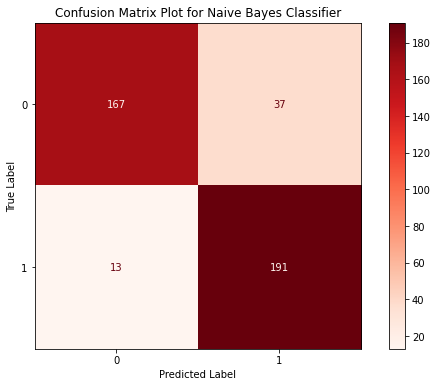

In [12]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(naive_bayes_classifier , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Naive Bayes Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [13]:
fprNB, tprNB, thresholdsNB = metrics.roc_curve(Ytest,y_pred)

##**Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
LRClassification=LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred=LRClassification.predict(Xtest_tf)


[[165  39]
 [ 13 191]]
0.8725490196078431
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       204
           1       0.83      0.94      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



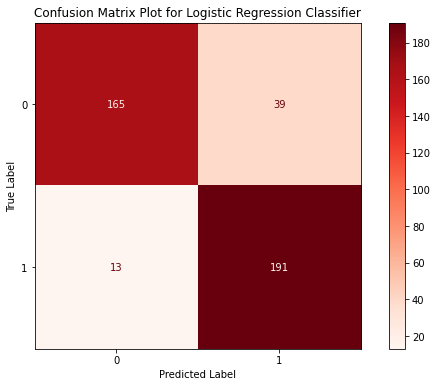

In [15]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest, y_pred))
print(classification_report(Ytest, y_pred))
matrix = plot_confusion_matrix(LRClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [16]:
fprLR, tprLR, thresholdsLR = metrics.roc_curve(Ytest,y_pred)

##**Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTClassification=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassification.fit(Xtrain_tf, Ytrain)
y_pred=DTClassification.predict(Xtest_tf)

[[187  17]
 [ 47 157]]
0.8431372549019608
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       204
           1       0.90      0.77      0.83       204

    accuracy                           0.84       408
   macro avg       0.85      0.84      0.84       408
weighted avg       0.85      0.84      0.84       408



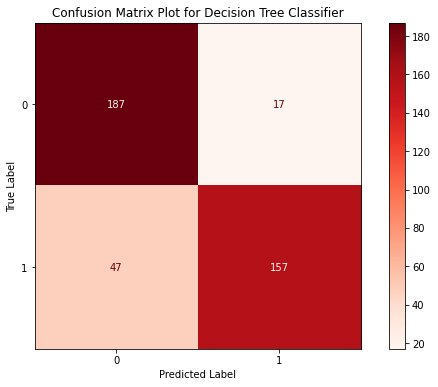

In [18]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(DTClassification , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Decision Tree Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [19]:
fprDT, tprDT, thresholdsDT = metrics.roc_curve(Ytest,y_pred)

##**SVM**

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(Xtrain_tf, Ytrain)
#Predict the response for test dataset
y_pred = clf.predict(Xtest_tf)

[[179  25]
 [ 14 190]]
0.9044117647058824
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



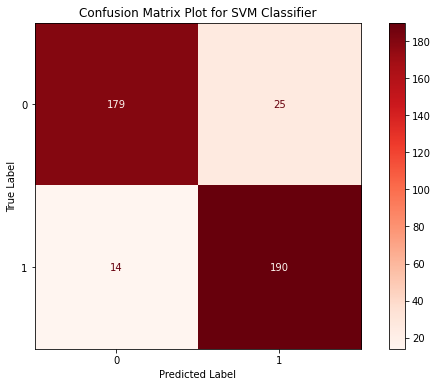

In [21]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(clf , Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SVM Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [22]:
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(Ytest,y_pred)

##**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0).fit(Xtrain_tf, Ytrain)
y_pred=rf_classifier.predict(Xtest_tf)

[[149  55]
 [ 13 191]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       204
           1       0.78      0.94      0.85       204

    accuracy                           0.83       408
   macro avg       0.85      0.83      0.83       408
weighted avg       0.85      0.83      0.83       408



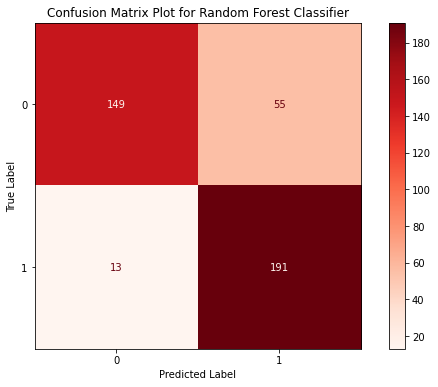

In [24]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(rf_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [25]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest,y_pred)

##**SGD**

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss = 'log',penalty='l2', max_iter=10,random_state=0).fit(Xtrain_tf, Ytrain)
y_pred=sgd_classifier.predict(Xtest_tf)

[[177  27]
 [ 16 188]]
0.8946078431372549
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       204
           1       0.87      0.92      0.90       204

    accuracy                           0.89       408
   macro avg       0.90      0.89      0.89       408
weighted avg       0.90      0.89      0.89       408



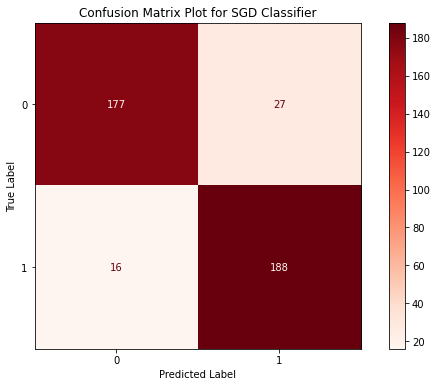

In [27]:
print(confusion_matrix(Ytest,y_pred))
print(accuracy_score(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
matrix = plot_confusion_matrix(sgd_classifier, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for SGD Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [28]:
fprSGD, tprSGD, thresholdsSGD = metrics.roc_curve(Ytest,y_pred)

##**RandomizedSearchCV**

In [29]:
svm_clf = svm.SVC(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             'kernel': ['rbf']}
              
rand_search = RandomizedSearchCV(svm_clf , param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(Xtrain_tf, Ytrain) 
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
  

[[180  24]
 [ 14 190]]
0.9068627450980392
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.89      0.93      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



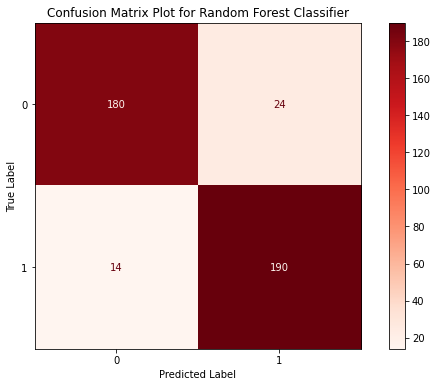

In [30]:
print(confusion_matrix(Ytest,rand_predictions))
print(accuracy_score(Ytest,rand_predictions))
print(classification_report(Ytest,rand_predictions))
matrix = plot_confusion_matrix(rand_search, Xtest_tf, Ytest, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix Plot for Random Forest Classifier', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [31]:
fprSVM_optimized, tprSVM_optimized, thresholds_optimized = metrics.roc_curve(Ytest,y_pred)

##**ROC**

<Figure size 432x288 with 0 Axes>

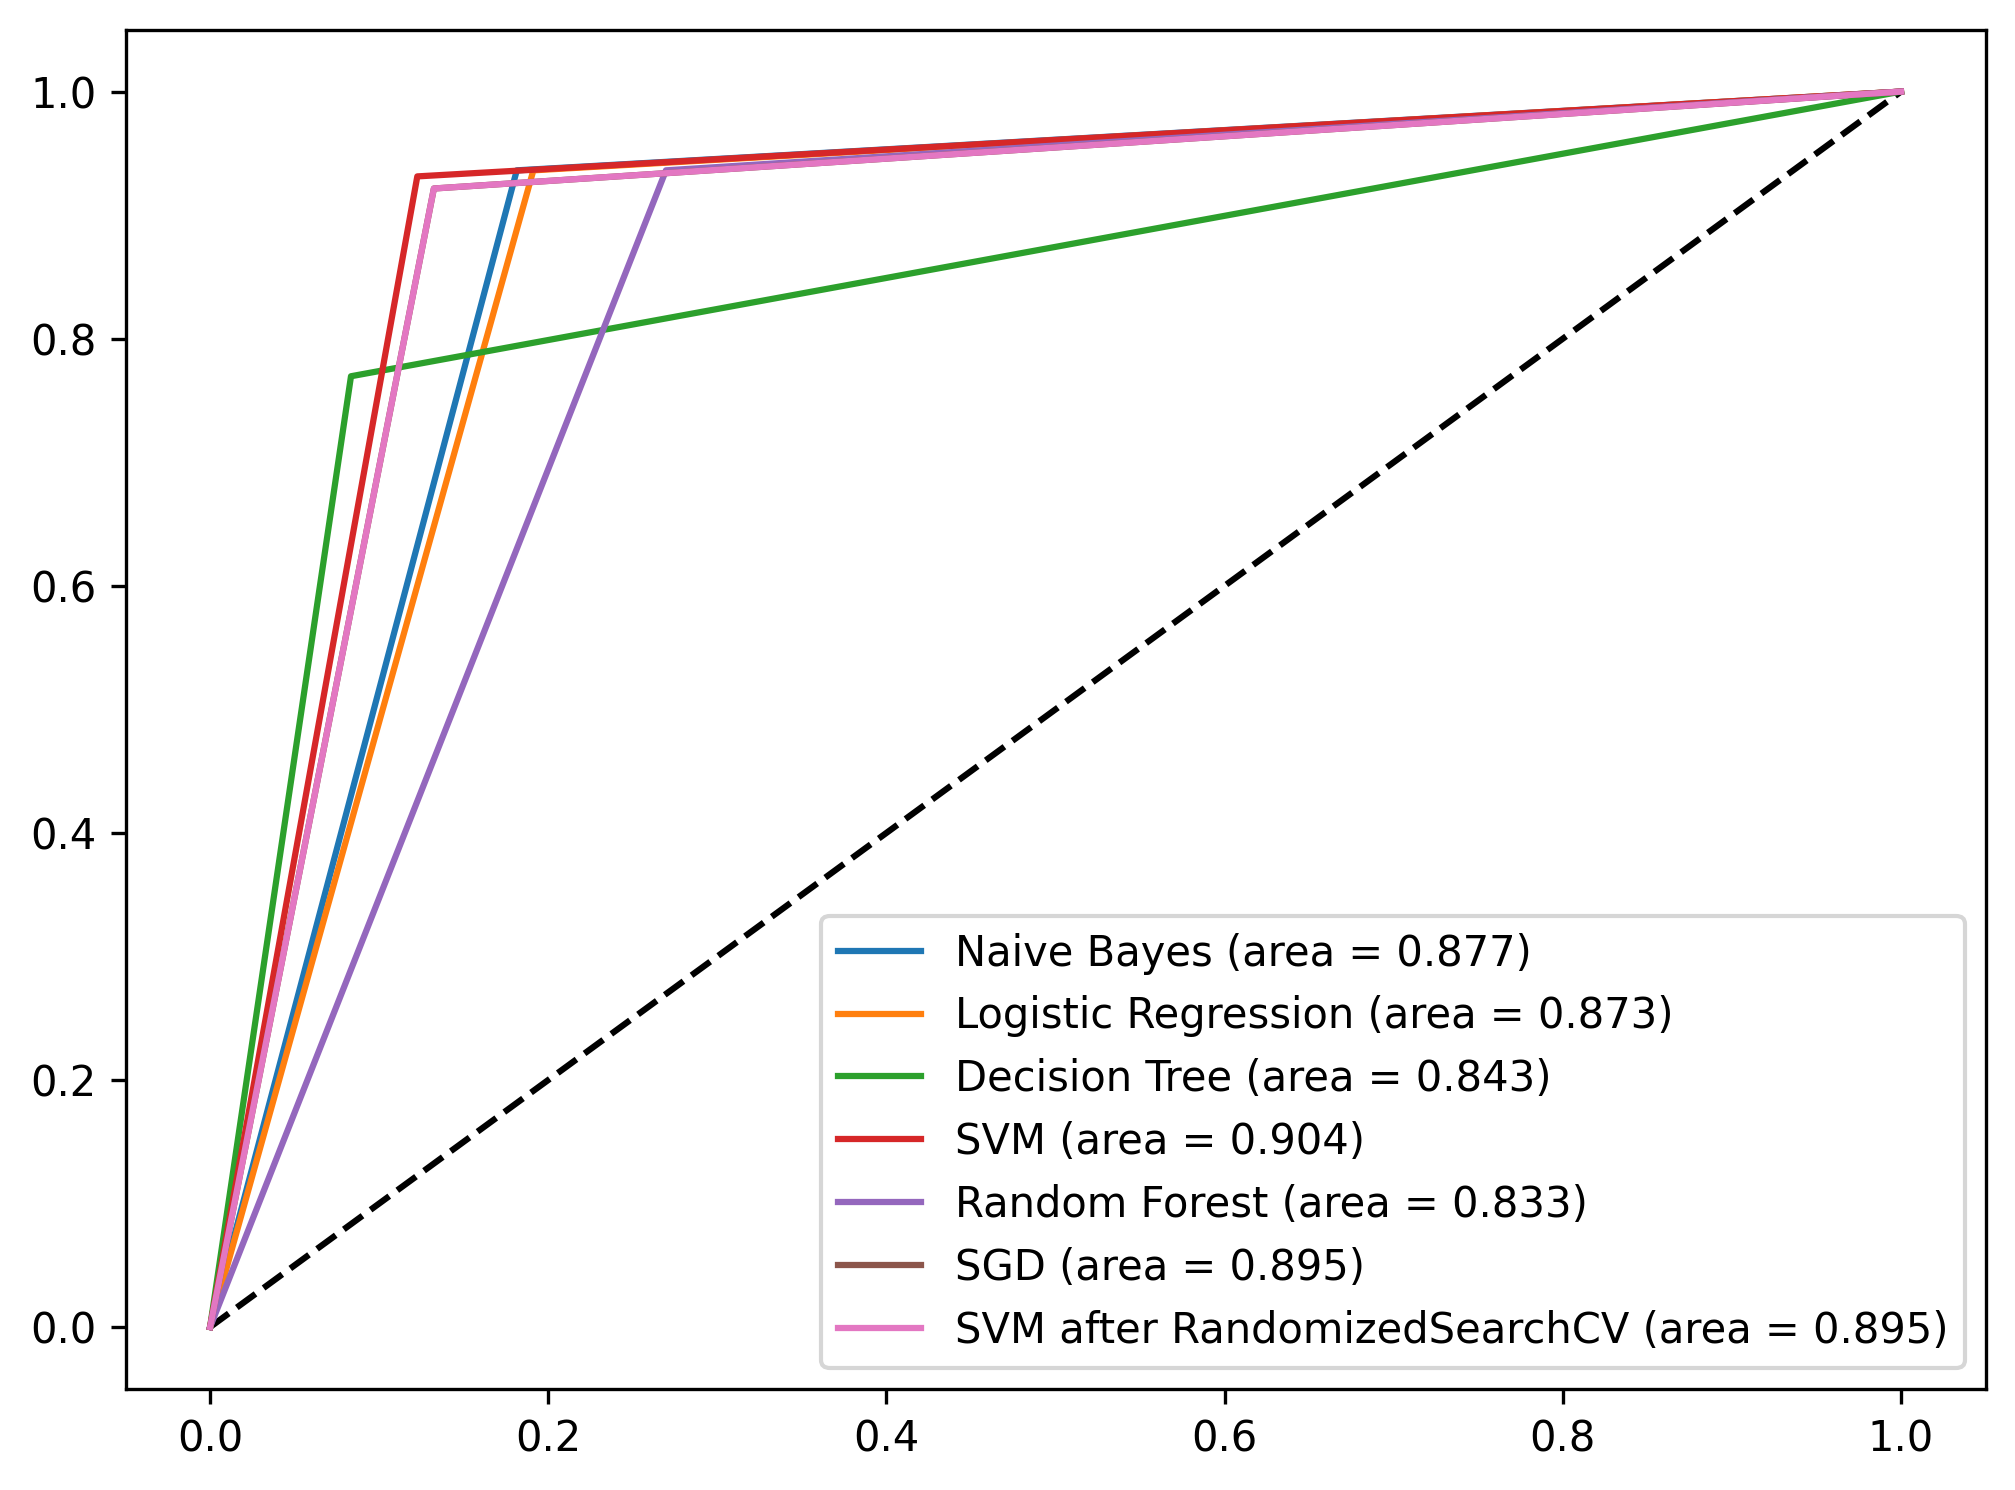

In [32]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_NB = auc(fprNB, tprNB)
auc_LR = auc(fprLR, tprLR)
auc_DT = auc(fprDT , tprDT)
auc_SVM = auc(fprSVM, tprSVM)
auc_RF = auc(fprRF, tprRF)
auc_SGD = auc(fprSGD, tprSGD)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized)

plt.plot(fprNB, tprNB, label='Naive Bayes (area = {:.3f})'.format(auc_NB))
plt.plot(fprLR, tprLR, label='Logistic Regression (area = {:.3f})'.format(auc_LR))
plt.plot(fprDT, tprDT, label='Decision Tree (area = {:.3f})'.format(auc_DT))
plt.plot(fprSVM, tprSVM, label='SVM (area = {:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area = {:.3f})'.format(auc_RF))
plt.plot(fprSGD, tprSGD, label='SGD (area = {:.3f})'.format(auc_SGD))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='SVM after RandomizedSearchCV (area = {:.3f})'.format(auc_SVM_optimized))


plt.legend(loc='lower right')
plt.show()